# Climate change

In [17]:
%%html
<script>
    document.getElementById('toggleButton').onclick = function () {
        if (code_shown) {
            $('div.input').hide('500');
            $('#toggleButton').val('Show Code')
        } else {
            $('div.input').show('500');
            $('#toggleButton').val('Hide Code')
        }
        code_shown = !code_shown
    }

    document.getElementById('init').onclick = function () {
        runAll = document.getElementById('run_all_cells_below').childNodes[1]
        runAll.click()
    }

    $(document).ready(function () {
        code_shown = false;
        $('div.input').hide()
    });
</script>
<input type="submit" id="toggleButton" value="Show Code">
<input id="init" type="submit" value="Initialize">

In [18]:
%%html
<script>
    runAll = document.getElementById('run_all_cells_below').childNodes[1]
    runAll.click()
</script>

## What do we know?

The Earth's climate has been subject to changes throughout history and most of these can be attributed to variations in Earth's orbit resulting in the amount of solar energy that is received. The reason behind significant increase in warming trend since the industrial revolution is extremely likely to be the result of human activity.

Earth is a complex intergrated system of components and processes. A disturbance in one component can have unprecedented and irreversible effects over another component. 

## How do we know?

Earth-orbiting satellites and other scientific advancements have made it possible to understand Earth on a global scale and have enabled scientists to collect many different types of information about our planet, its climate and use it to analyze how it has changed over the years. 

It is important to understand the evidence available for global climate change and the potential impacts it can cause in order to address the challenges that we may face. Knowing how these Earth systems have changed in the past and how they are changing in response to climate change now will help us understand how they will likely change in the future.

Scientists gather data on global temperature, Carbon dioxide in the atmosphere, Arctic sea ice, land ice and sea level on a regular basis to analyze and understand how climate is changing over the years.

## Evidence for rapid climate change

### Evidence 1 : Global Land-Ocean Termperature index


Data Source & Inspiration: NASA Global Climate Change, https://climate.nasa.gov/vital-signs/global-temperature/


Below you can see a visualization created by NASA's scientific visualization studio showing the Global temperature anomalies from 1880 to 2017.

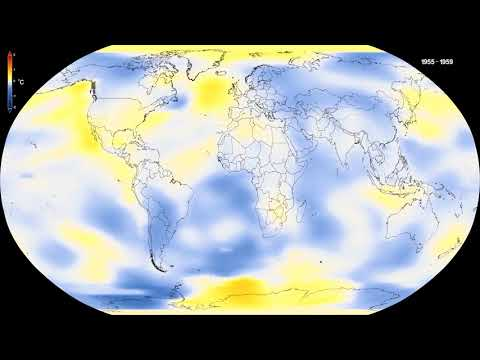

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('xlrFFiSROmg')

In [20]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly.graph_objs import *

In [21]:
url = 'https://climate.nasa.gov/system/internal_resources/details/original/647_Global_Temperature_Data_File.txt'

global_temperature_df = pd.read_table(url, sep='\s+', header=None, names=['Year','Annual Mean', 'Lowess smoothing'])

In [22]:
global_temperature_df.tail(20)

,Year,Annual Mean,Lowess smoothing
118,1998,0.62,0.45
119,1999,0.40,0.48
120,2000,0.40,0.50
121,2001,0.54,0.52
122,2002,0.62,0.55
123,2003,0.61,0.58
124,2004,0.53,0.60
125,2005,0.67,0.61
126,2006,0.62,0.61
127,2007,0.64,0.61


In [23]:
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = global_temperature_df['Year'],
    y = global_temperature_df['Annual Mean'],
    mode = 'lines+markers',
    name = 'Annual Mean'
)

trace1 = go.Scatter(
    x = global_temperature_df['Year'],
    y = global_temperature_df['Lowess smoothing'],
    mode = 'lines+markers',
    name = 'Lowess smoothing'
)

data = [trace0,trace1]
layout = go.Layout(dict(title='Global Land Ocean Temperature Index'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature Anomaly')
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

This graph illustrates the change in global surface temperature relative to 1951-1980 average temperatures. Seventeen of the 18 warmest years in the 136-year record all have occurred since 2001, with the exception of 1998. The year 2016 ranks as the warmest on record. 

By looking at the graph above and the video one can see that 2016 was the warmest year since modern record keeping began.

### Questions

The graph below illustrates the Annual average temperature departures from the 1961-1990 reference value (or the average temperatures recorded between 1961 to 1990) in Canada from 1948 to 2014. The data was obtained from Government of Canada's Open Data Portal: https://open.canada.ca/data/en/dataset/49118c5d-850c-40bd-af75-4f47650a9800

Take a look at the graph and answer the questions that follow.

In [24]:
ca_url = 'https://www.canada.ca/content/dam/eccc/migration/main/indicateurs-indicators/64c9e931-fcc6-4df6-ad44-c2b0236fe255/temperaturechange_en.csv'

ca_df = pd.read_table(ca_url, sep=",", skiprows=[0,1])

In [25]:
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = ca_df['Year'],
    y = ca_df['Temperature departure (degrees Celsius)'],
    mode = 'lines+markers',
    name = 'Annual Mean'
)

trace1 = go.Scatter(
x = ca_df['Year'],
y = [0]*len(ca_df['Temperature departure (degrees Celsius)']),
mode = 'lines',
#opacity = 0.5,
name='Reference value',
hoverinfo = 'none'
)
data = [trace0, trace1]
layout = go.Layout(dict(title='Annual Average temperature departures in Canada'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Temperature Anomaly')
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

1. What was the warmest and coldest year in Canada and by how much was it above or below the reference value?
2. Do you see a trend in the annual average temperature departure? Is it an upward or downward trend and what does it signify?

### Evidence 2: Decline in extent and thickness of Arctic Sea Ice

Scientists keep a close eye on Arctic sea ice as it warms through the years and it is found to be shrinking by about 13.2% per decade, relative to the 1981 to 2010 average.

Decrease in both sea ice extent and area impacts a wide variety of marine lives that sustain in the Arctic right from single-celled algae to bowhead whales, polar bears and other mammals not excluding the indigenous people who rely on sea ice for transportation and hunting.

The data used below is a curated by NASA's global climate change intiative, originally pulled from National Snow and Ice Data Center.

In [26]:
url = 'https://climate.nasa.gov/system/internal_resources/details/original/1270_minimum_extents_and_area_north_SBA_reg_20171001_2_.txt'

arctic_ice_df = pd.read_table(url, sep='\s+', skiprows=[0,1,2,3],header=None, names=['Year', 'MN', 'DY', 'Ice Extent', 'Year1', 'MN1', 'DY1', 'Ice Area'])

In [27]:
arctic_ice_df.head(10)

,Year,MN,DY,Ice Extent,Year1,MN1,DY1,Ice Area
0,1979,9,21,6998892.433,1979,9,21,6455322.563
1,1980,8,26,7862302.527,1980,8,26,7010784.424
2,1981,9,10,7203627.698,1981,9,6,6438129.712
3,1982,9,17,7342438.729,1982,9,9,6662314.987
4,1983,9,14,7537161.907,1983,9,6,6785270.823
5,1984,9,16,6839268.654,1984,9,10,6206512.681
6,1985,9,7,6790226.564,1985,9,7,6140910.783
7,1986,9,6,7387939.512,1986,9,8,6663552.810
8,1987,8,27,7298438.906,1987,8,23,6248912.671
9,1988,9,6,7468998.976,1988,8,30,6492643.306


In [28]:
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = arctic_ice_df['Year'],
    y = arctic_ice_df['Ice Extent'],
    mode = 'lines+markers',
    name = 'Ice Extent'
)

trace1 = go.Scatter(
x = arctic_ice_df['Year'],
y = arctic_ice_df['Ice Area'],
mode = 'lines+markers',
#opacity = 0.5,
name='Ice Area',
#hoverinfo = 'none'
)
data = [trace0, trace1]
layout = go.Layout(dict(title='Arctic Sea Ice Index'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Million Square Kms')
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)

### Evidence 3: Sea level rise

The Global Mean Sea Level (GMSL) increases due to thermal expansion of water and by melting of ice sheets and glaciers on land 

The GMSL has risen by 10 to 20 centimeters over the past century and the annual rate of rise is at 3.2mm per year over the past 20years.

As Sea water level increases and reaches inland, it can cause erosion, more flooding, lost of habitat for fish, birds and plants. It also affects lives of millions of people who live in sea water flood prone low lying islands and other coastal regions.

Below you will see the data that illustrates changes in sea level since 1993 from NASA's satellite sea level observations.

In [29]:
url = 'ftp://podaac.jpl.nasa.gov/allData/merged_alt/L2/TP_J1_OSTM/global_mean_sea_level/GMSL_TPJAOS_4.2_199209_201801.txt'

sea_level_df = pd.read_table(url, sep='\s+', comment='H', header=None, usecols=[2,11], names=['Date','GMSL_variation'])

In [30]:
from datetime import timedelta, datetime

def convert_partial_year(number):

    year = int(number)
    d = timedelta(days=(number - year)*365)
    day_one = datetime(year,1,1)
    date = d + day_one
    return date

sea_level_df['Date'] = sea_level_df['Date'].apply(convert_partial_year)

In [31]:
sea_level_df.head(10)

,Date,GMSL_variation
0,1993-01-05 04:58:03.936007,-37.52
1,1993-01-15 02:56:30.912003,-38.05
2,1993-01-25 00:54:57.887998,-37.61
3,1993-02-03 22:53:56.399997,-37.49
4,1993-02-13 20:52:23.375999,-36.48
5,1993-02-23 18:50:50.352002,-35.37
6,1993-03-05 16:49:17.328004,-34.35
7,1993-03-15 14:47:44.304000,-33.57
8,1993-03-25 12:46:11.280002,-33.02
9,1993-04-04 10:44:38.256005,-32.68


In [33]:
init_notebook_mode(connected=True)

trace0 = go.Scatter(
    x = sea_level_df['Date'],
    y = sea_level_df['GMSL_variation']-sea_level_df['GMSL_variation'][1],
    mode = 'lines',
    name = 'Global Mean Sea level (GMSL) variation'
)

data = [trace0]
layout = go.Layout(dict(title='Global Mean Sea level (GMSL) variation'),
                   xaxis=dict(title='Year'),
                   yaxis=dict(title='Sea height variation (mm)')
)
fig = go.Figure(data=data,layout=layout)
iplot(fig)